# SKlearn tutorial

*Main reference: [Scikit\-learn Crash Course \- Machine Learning Library for Python \- YouTube](https://www.youtube.com/watch?v=0B5eIE_1vpU "Scikit\-learn Crash Course \- Machine Learning Library for Python \- YouTube")*

*Notebooks: [koaning\/calm\-notebooks\: notebooks that are used at calmcode\.io](https://github.com/koaning/calm-notebooks "koaning\/calm\-notebooks\: notebooks that are used at calmcode\.io")*

In [1]:
%load_ext autoreload
%autoreload 3

In [371]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# For pretty printing DFs in python notebooks
from IPython.display import display

# Block for notebook runs
from dc2_python_utils.python_utils_ds.utils_plotting import *
from dc2_python_utils.python_utils_ds.utils_sklearn import *
from dc2_python_utils.python_utils_general.utils_printing import *

## Initial inspection

In [3]:
# Get input data frame and x y
housing_bunch = get_sklearn_dataset(dataset="california")
housing_df = housing_bunch.frame
X, y = list(housing_bunch.xy.values())
feature_names_str = '\n===\n'+'\n'.join(get_sklearn_dataset(dataset='california').feature_names)
target_names_str = '\n===\n'+'\n'.join(get_sklearn_dataset(dataset='california').target_names)
print(f"X column keys: {feature_names_str}\n\nSample - {X[:3]}\n")
print(f"y column keys: {target_names_str}\n\nSample - {y[:3]}\n")

housing_df.head()

X column keys: 
===
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude

Sample - [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]

y column keys: 
===
MedHouseVal

Sample - [4.526 3.585 3.521]

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

Notice above, that there might be some useful features that might correlate well with `MedHouseVal` target, e.g.:
- `HouseAge`
- `AveRooms`
- etc.

However, some points of preprocessing can be made here. E.g.
- Scaling features when using clustering methods such as `KNN` so that the order of magnitude for each value is scaled. I.e. if x1 is in the decimals and x2 is in 1000s then it may be favourible to x2 distance wise for KNN

Let's try to plot an x value with the target `MedHouseVal`

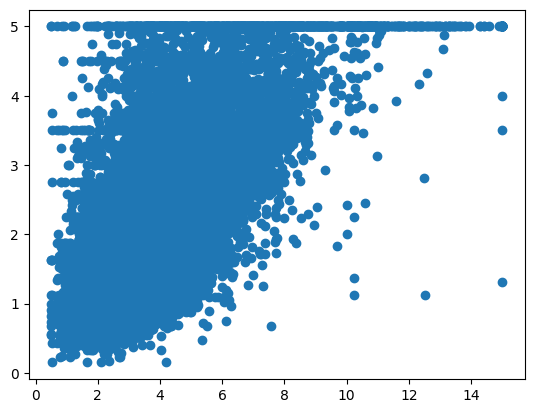

In [4]:
make_plot(housing_df['MedInc'].values,y,'scatter')

Seems like there's not a lot of correlation though.. Let's continue

In [5]:
# Analyse y data
values, counts = np.unique(y, return_counts=True)

print(f"Unique values - {values}\n")
print(pd.Series(y).describe().round(2))

Unique values - [0.14999 0.175   0.225   ... 4.991   5.      5.00001]

count    20640.00
mean         2.07
std          1.15
min          0.15
25%          1.20
50%          1.80
75%          2.65
max          5.00
dtype: float64

In [6]:
# Get metadata description of sklearn data via DESC attr
print(get_sklearn_dataset(dataset="california").DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

## Create / explore models

In [7]:
# Define and fit models (already fitted)
model_knn = KNeighborsRegressor().fit(X, y)
model_lr = LinearRegression().fit(X, y)

# Predict models
pred_knn = model_knn.predict(X)
pred_lr = model_lr.predict(X)

## Evaluation of simple models

[2.826802 2.1594   3.650404 2.3458   3.171602]

count    20640.00
mean         2.02
std          0.64
min          0.64
25%          1.57
50%          1.93
75%          2.38
max          5.00
dtype: float64

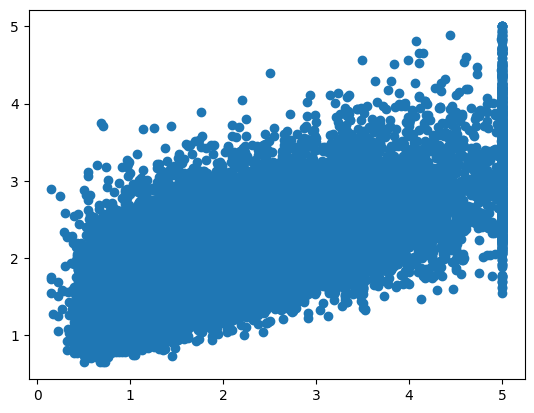

In [8]:
# Evaluate KNN

print(pred_knn[:5])

# See the data distribution
print(pd.Series(pred_knn).describe().round(2))

# Plot
make_plot(x=y, y=pred_knn, method="scatter")

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]

count    20640.00
mean         2.07
std          0.90
min         -1.02
25%          1.50
50%          2.02
75%          2.55
max          8.97
dtype: float64

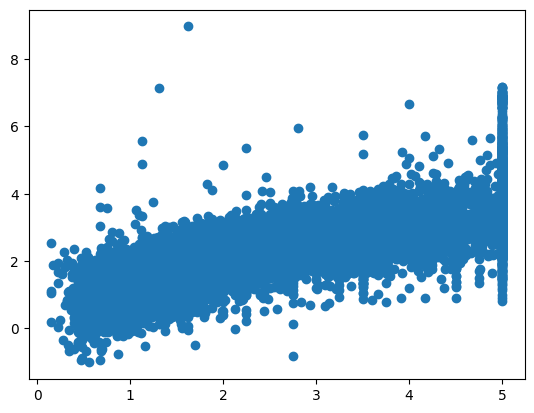

In [9]:
# Evaluate LR

print(pred_lr[:5])

# See the data distribution
print(pd.Series(pred_lr).describe().round(2))

# Plot
make_plot(x=y, y=pred_lr, method="scatter")

## Create pipeline

In [10]:
# Create a pipeline and fit

pl = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

# Note, this is the equivalent to below. NOTE: The scaled input, is also what needs to be predicted on.
#scaled_x = StandardScaler().fit(X).transform(X)
#pred_scaled_x = KNeighborsRegressor().fit(scaled_x,y).predict(scaled_x)

pl.fit(X,y)

pred_pl_scaled_knn = pl.predict(X)

pl

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

[4.661406 4.3096   4.236604 4.038204 2.8116  ]

count    20640.00
mean         2.06
std          0.99
min          0.44
25%          1.31
50%          1.89
75%          2.62
max          5.00
dtype: float64

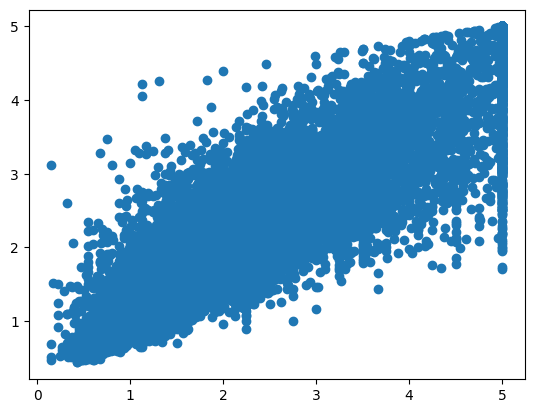

In [11]:
# Evaluate new pipeline model

print(pred_pl_scaled_knn[:5])

# See the data distribution
print(pd.Series(pred_pl_scaled_knn).describe().round(2))

# Plot
make_plot(x=y, y=pred_pl_scaled_knn, method="scatter")

## USING CV - Evaluating KNN for multiple neighbour params

<div>
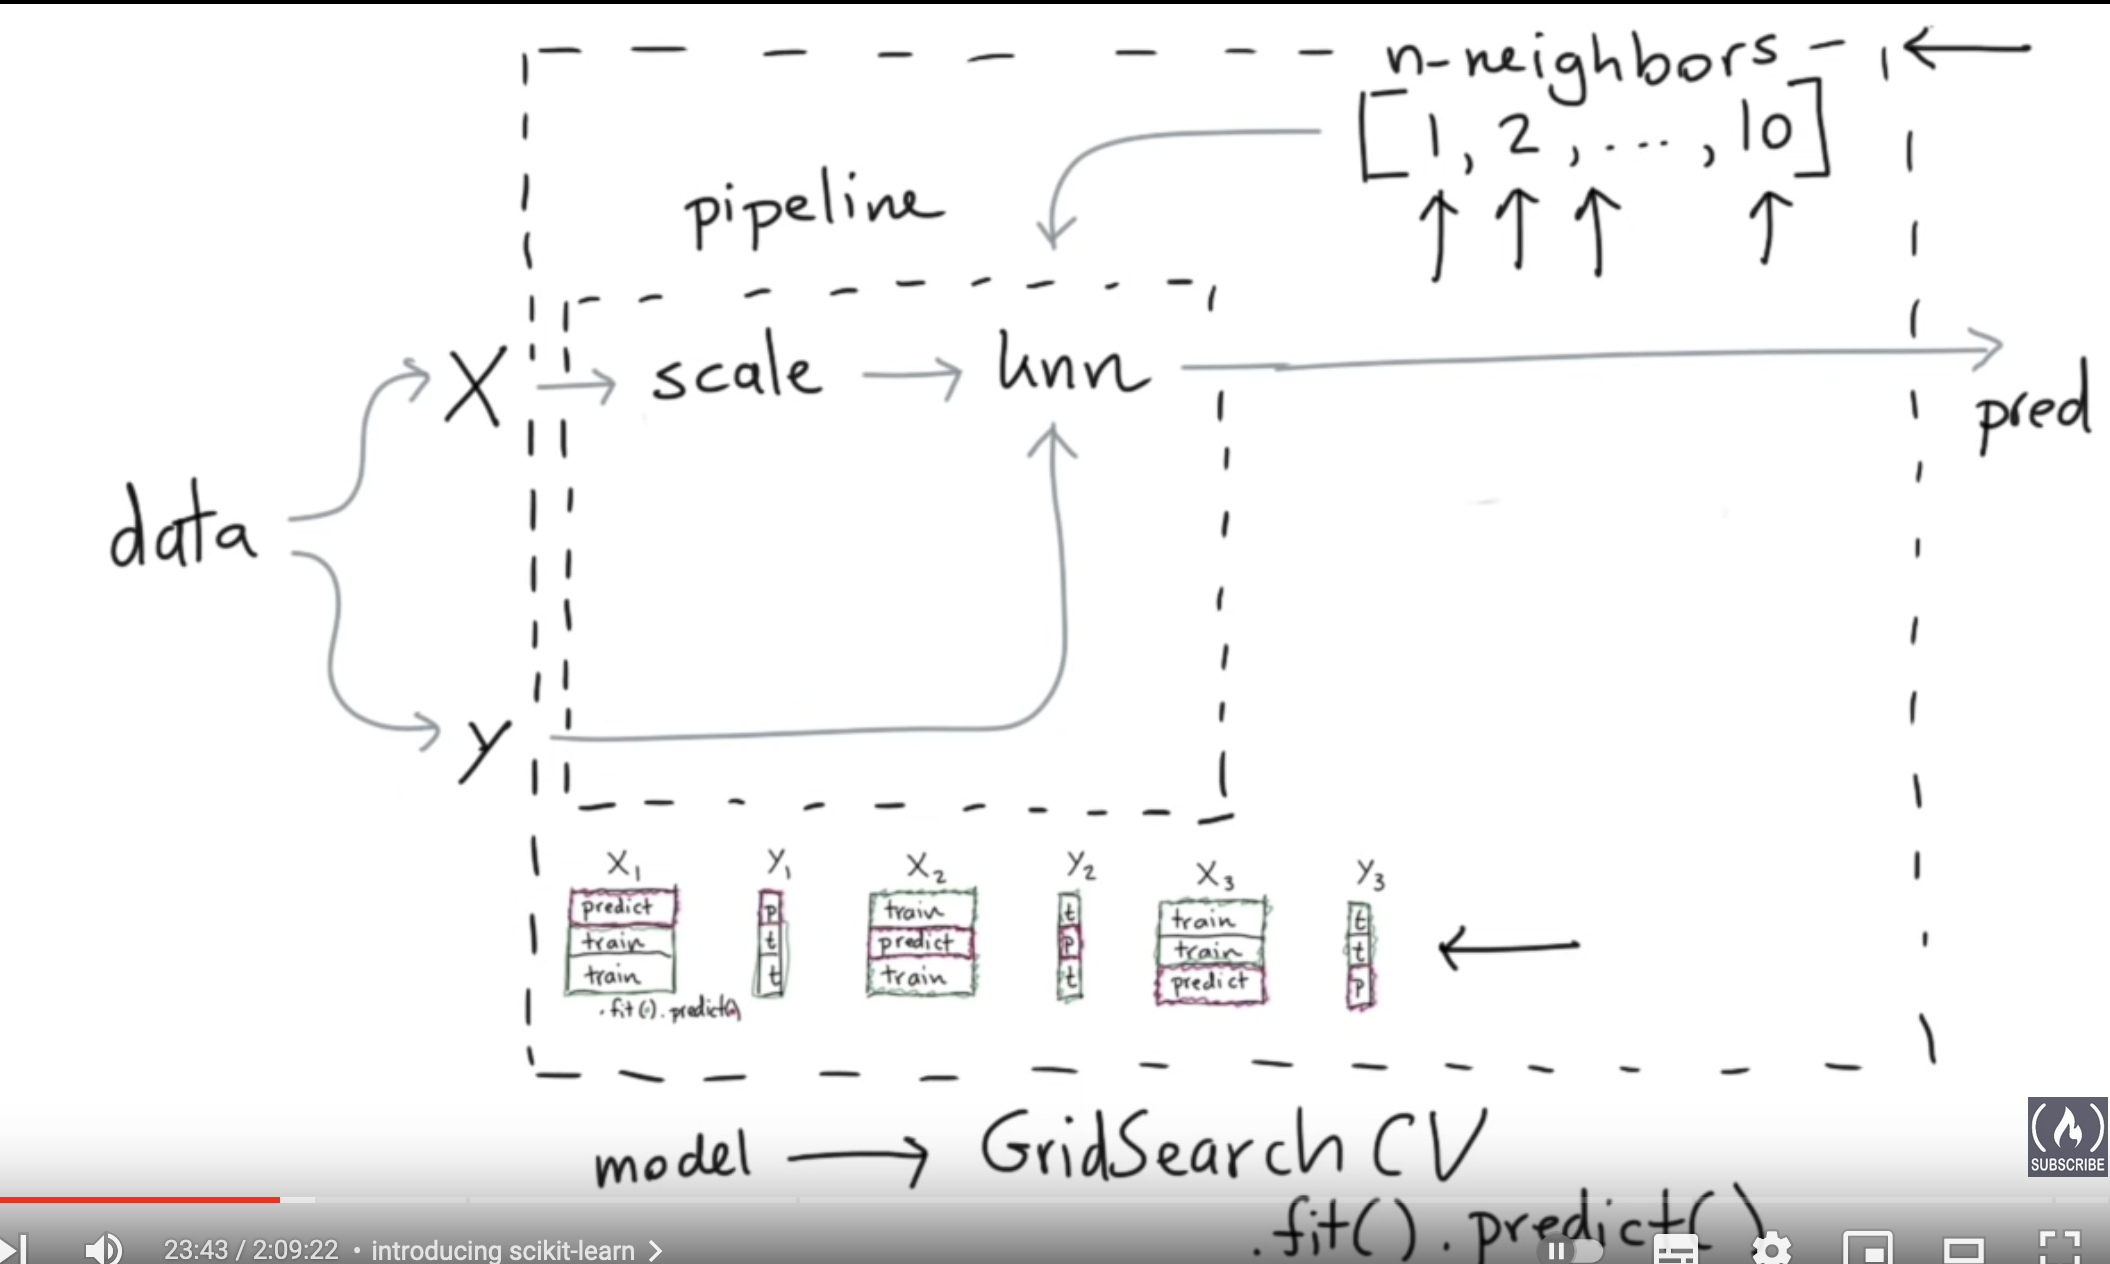
</div>


As we can see from above, we can use CV to both:
- Evaluate the best KNN neighbors value param to use
- For each neighbor value, get a mean score using CV to get a mean measure of the performance

In [12]:
pl.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [13]:
# USING CV - Evaluating KNN for multiple neighbour params

from sklearn.model_selection import GridSearchCV

# List available methods
print(f"List of available pipeline params! (using .get_params())\n===\n{print_dict(pl.get_params(),method='manual',return_str=True)}")

List of available pipeline params! (using .get_params())
===
memory: None
steps: [('scale', StandardScaler()), ('model', KNeighborsRegressor())]
verbose: False
scale: StandardScaler()
model: KNeighborsRegressor()
scale__copy: True
scale__with_mean: True
scale__with_std: True
model__algorithm: auto
model__leaf_size: 30
model__metric: minkowski
model__metric_params: None
model__n_jobs: None
model__n_neighbors: 5
model__p: 2
model__weights: uniform

***NOTE***: The param we want to use as can be seen above, for the below `param_grid` in the CV object is `model__n_neighbors`.

In [14]:
# Perform cross validation (partitioned to 3) for each neighbour value!

pl_model_w_cv = GridSearchCV(
    estimator = pl,
    param_grid = {'model__n_neighbors':[i for i in range(1,11)]},
    cv = 3
)
pl_model_w_cv

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [15]:
# Perform training using CV of various params

pl_model_w_cv.fit(X,y)
print(f"Columns\n===\n[\n{print_list(pl_model_w_cv.cv_results_.keys(),prefix='  ',return_str=True)}\n]\n")
pd.DataFrame(pl_model_w_cv.cv_results_)[[
    'params','split0_test_score','split1_test_score','split2_test_score','mean_test_score','std_test_score','rank_test_score'
]]

Columns
===
[
  mean_fit_time
  std_fit_time
  mean_score_time
  std_score_time
  param_model__n_neighbors
  params
  split0_test_score
  split1_test_score
  split2_test_score
  mean_test_score
  std_test_score
  rank_test_score
]

params  split0_test_score  split1_test_score  \
0   {'model__n_neighbors': 1}           0.324068           0.334830   
1   {'model__n_neighbors': 2}           0.468788           0.503457   
2   {'model__n_neighbors': 3}           0.518547           0.543340   
3   {'model__n_neighbors': 4}           0.540323           0.564974   
4   {'model__n_neighbors': 5}           0.551149           0.579313   
5   {'model__n_neighbors': 6}           0.558435           0.586185   
6   {'model__n_neighbors': 7}           0.564207           0.590509   
7   {'model__n_neighbors': 8}           0.568637           0.593942   
8   {'model__n_neighbors': 9}           0.571972           0.594863   
9  {'model__n_neighbors': 10}           0.573760           0.595831   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.323371         0.327423        0.005245               10  
1           0.424388         0.465544        0.032361                9  
2           0.473595         0.511827        0.028867                8  
3           0.499827         0.535041        0.026857                7  
4           0.511781         0.547414        0.027696                6  
5           0.521134         0.555251        0.026652                5  
6           0.525223         0.559979        0.026820                4  
7           0.529337         0.563972        0.026580                3  
8           0.529928         0.565588        0.026891                2  
9           0.532973         0.567522        0.026038                1

***NOTE:*** We can observe from the above, from `rank_test_score` and `mean_test_score` that the highest performer is the param of 10 nearest neighbors! Let's try repeat this experiment with a few more parameters and extract the best scorer.

In [16]:
pl_model_w_cv = GridSearchCV(
    estimator = pl,
    param_grid = {'model__n_neighbors':[i for i in range(10,31,5)]},
    cv = 3
)
pl_model_w_cv.fit(X,y)
pd.DataFrame(pl_model_w_cv.cv_results_)[[
    'params','mean_test_score','std_test_score','rank_test_score'
]].sort_values(by='rank_test_score',ignore_index=True)

params  mean_test_score  std_test_score  \
0  {'model__n_neighbors': 15}         0.571886        0.027716   
1  {'model__n_neighbors': 20}         0.571768        0.028108   
2  {'model__n_neighbors': 25}         0.571411        0.028037   
3  {'model__n_neighbors': 30}         0.570749        0.027871   
4  {'model__n_neighbors': 10}         0.567522        0.026038   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5

From the above - Looks like NN of 15 is the winner!

We now will display the plot. Notice when predicting -> It seems to just select the best model version, i.e. the highest ranked one where neighbors = 15 (*THIS NEEDS TO BE VERIFIED!*)

👇

(CV w PL model predictions) == (KNN with 15 neighbours)?: True

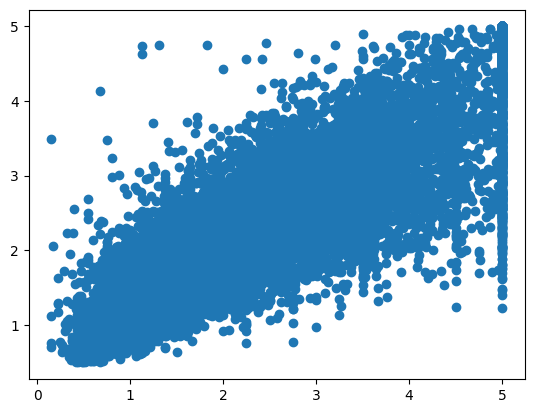

In [17]:
pred_pl_model_w_cv = pl_model_w_cv.predict(X)
pred_knn_15 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=15))
]).fit(X,y).predict(X)

print(
    f"(CV w PL model predictions) == (KNN with 15 neighbours)?: "
    f"{False not in np.equal(pred_pl_model_w_cv,pred_knn_15)}"
)

make_plot(y,pl_model_w_cv.predict(X),method='scatter')

## Preprocessing - scaling and transforming datasets

The data files read below are created using [Introducing Drawdata from Calmcode Labs](https://calmcode.io/labs/drawdata.html "Introducing Drawdata from Calmcode Labs").

### Using the standard scaler

In [18]:
df = pd.read_csv('../datasets/drawn_data.csv')

x = df[['x','y']].values
y = df['z']== "a"

x_new = StandardScaler().fit_transform(x)
fit_transform_is_equal_to_fit_then_transform = \
    all(np.equal(x_new,StandardScaler().fit(x).transform(x)).flatten())
print(f"{fit_transform_is_equal_to_fit_then_transform}")
print(x_new[:3])

True

[[-0.2199274  -0.0063465 ]
 [-0.12819607  0.17489345]
 [ 0.00573178  0.04377824]]

We can use the `StandardScaler` object in order to **standardise the scale of each feature.** I.e. this effectively menas feeding an array of X = [f1,f2,f3...], it will standardise each feature!

StandardScaler = $(x-mean)/std$

Notice how it is a difference of the mean OVER the std (which is effectively the average difference per sample to mean). So this will scale / ratio the difference of each sample point to the average difference.

ANOTHER way to think of standard scaler, is **REMAPPING** the axes to a *normalised* scale, the distribution of the plots remain the same as we can see below 👇.

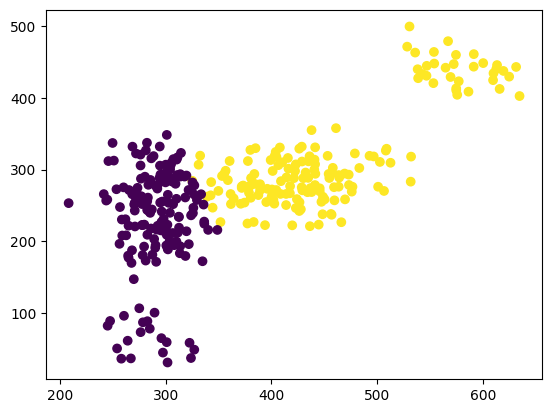

In [19]:
make_plot(x[:,0],x[:,1],'scatter',c=y)

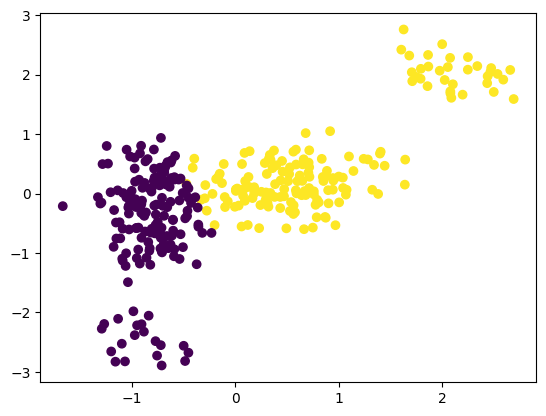

In [20]:
make_plot(x_new[:,0],x_new[:,1],'scatter',c=y)

One limitation of the stdscaler as can be seen above is that if there are **outliers** in the dataset, as the general distribution of the data remains the same.

<div>
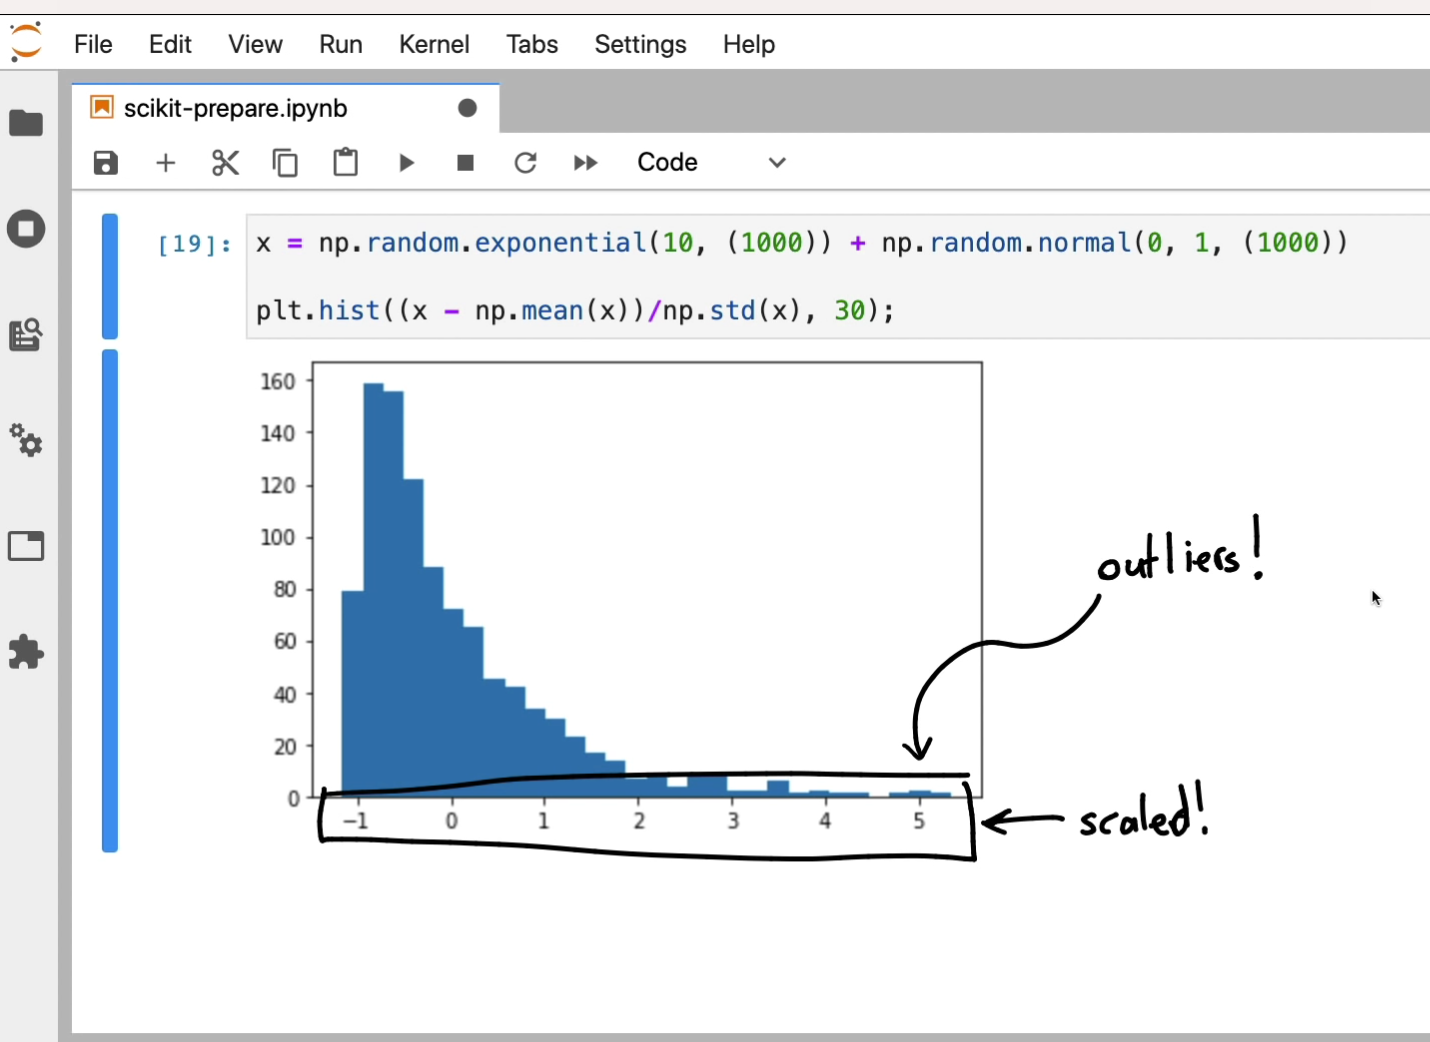
</div>

### Using the quantile scaler

If there are outliers in the dataset, we might want to scale the distributino of the dataset around the mean, so that it's centered around 50.


<div>
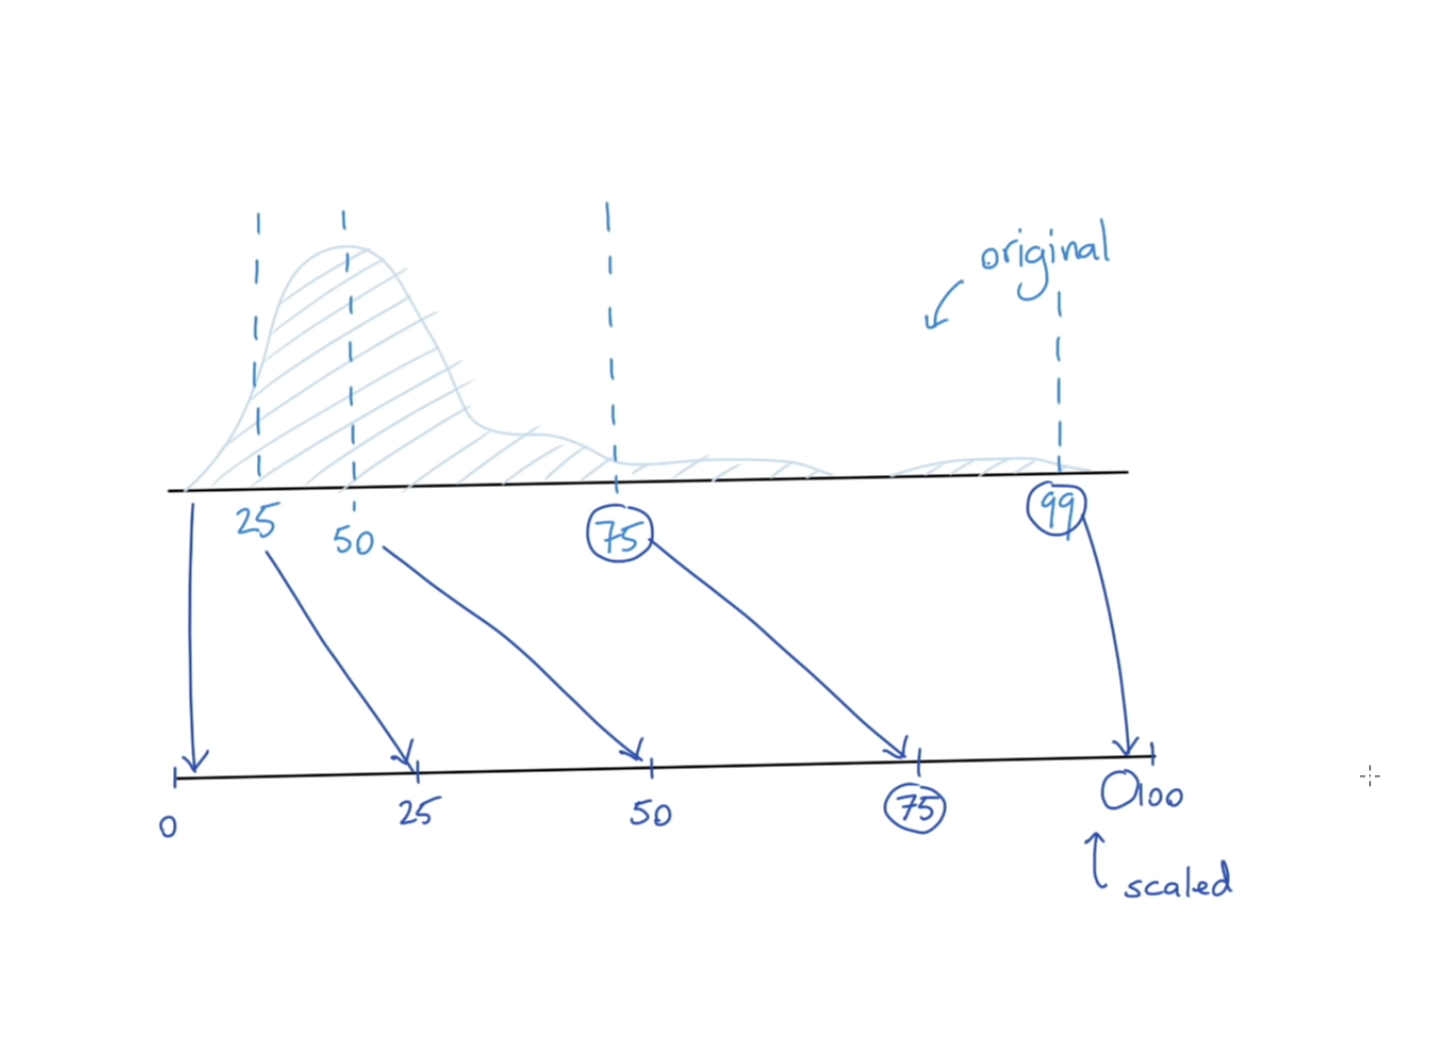
</div>

In [28]:
def plot_output(scaler):
    import matplotlib.pylab as plt
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(x, y).predict(x)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(x)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, x[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, x[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Original value vs scaled value:
(array([349.91871005, 270.21472053]), array([0.5243528 , 0.48548314]))
(array([358.90087392, 285.22923409]), array([0.54039556, 0.61243639]))
(array([372.01484361, 274.36721882]), array([0.55914361, 0.5248204 ]))

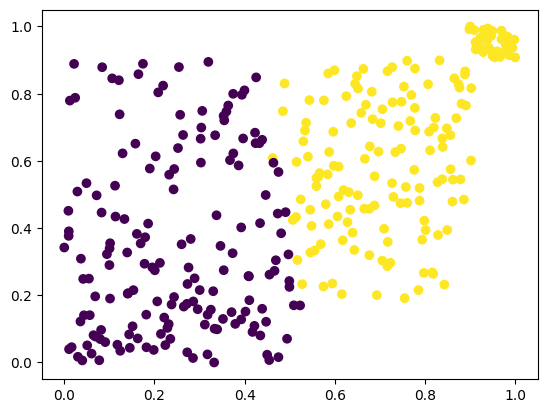

In [29]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles=100).fit_transform(x)

print(f"Original value vs scaled value:\n"
      f"{print_list(list(zip(x[:3],X_new[:3])),return_str=True)}")
make_plot(X_new[:, 0], X_new[:, 1],'scatter',c=y)

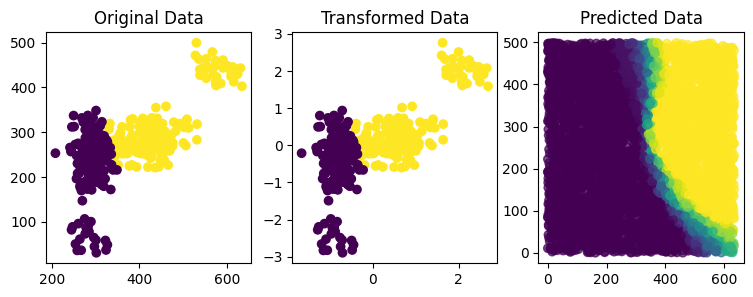

In [30]:
plot_output(StandardScaler())

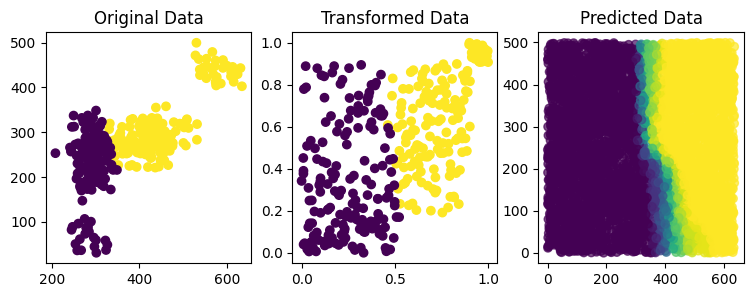

In [31]:
plot_output(QuantileTransformer(n_quantiles=100))

This is much better -> Will be easier for model to segment sections!

Let's now look at another dataset

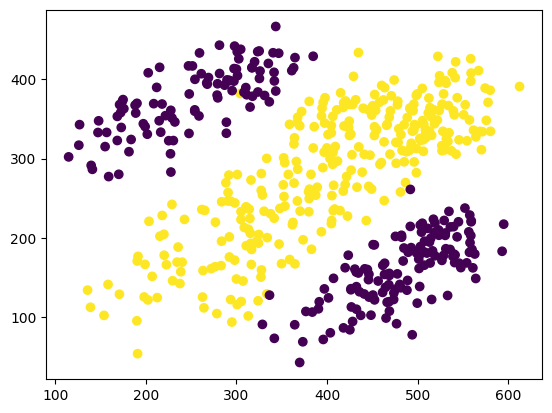

In [32]:
df = pd.read_csv('../datasets/drawn_data2.csv')
X = df[['x','y']].values
y = df['z']== "a"

make_plot(X[:,0],X[:,1],'scatter',c=y)

Using a logistic regression might not be the best because we only have a line to separate..

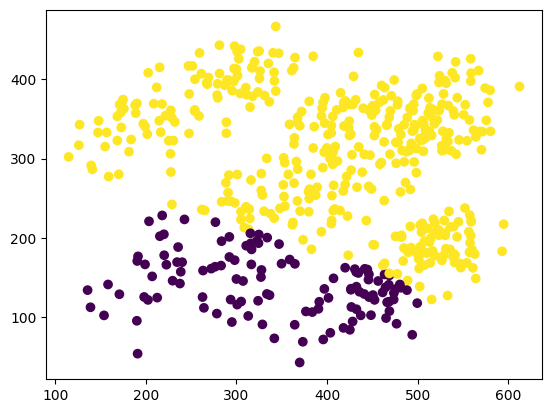

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

pred = Pipeline([
    ('scale',QuantileTransformer(n_quantiles=100)),
    ('model',LogisticRegression())
]).fit(X,y).predict(X)

make_plot(X[:,0],X[:,1],'scatter',c=pred)

***NOTICE*** how linear regression doesn't work here. Let's add some nonlinear features, i.e. degree-2 polynomial features are [1, a, b, a^2, ab, b^2] and see how this works again.

**WHY this works, is not explained / not clear :/ ❓❓**

Is manual_pred == pl_pred?: True

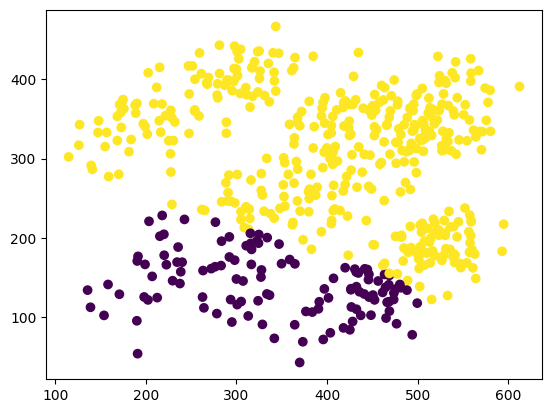

In [34]:
pl_pred = Pipeline([
    ('scale',PolynomialFeatures()),
    ('model',LogisticRegression())
]).fit(X,y).predict(X)

xx = PolynomialFeatures().fit_transform(X)
manual_pred = LogisticRegression().fit(xx,y).predict(xx)

print(f"Is manual_pred == pl_pred?: {all(np.equal(manual_pred,pl_pred).flatten())}")

make_plot(X[:,0],X[:,1],'scatter',c=pred)

### Using the OHE transformer (for categorical data)

Given the below categorical feature, where avail values are `low`, `medium` and `high`, let's try and transform this via OHE.

In [68]:
from sklearn.preprocessing import OneHotEncoder

arr = ['low','low','high','medium']

In [70]:
try:
    OneHotEncoder().fit_transform(arr)
except Exception as e:
    print(f'WARNING\n===\n\n{e}')

WARNING
===

Expected 2D array, got 1D array instead:
array=['low' 'low' 'high' 'medium'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it
contains a single sample.

See error above. As a result, we'd like a function that transforms single features or single entries :)

In [75]:
arr = single_feature_reshape(arr)
enc = OneHotEncoder(sparse_output = False,handle_unknown='ignore',)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Notice the following parameters were used in the OHE object. Their explanation follows:
- `sparse_output`: Does not return a sparse_output object
- `handle_unknown`: If asked to *transform* an unknown object

For the latter param, see below how feeding an unknown input will **NOT** yield an error, where it otherwise might with this option unused! *Note*: The returned value for the feature will be `0` though.

In [78]:
print(enc.transform(single_feature_reshape(['low'])))
print(enc.transform(single_feature_reshape(['asd'])))

[[0. 1. 0.]]

[[0. 0. 0.]]

## Metrics

### Read in data

Let's try and implement the below high level pipeline using the kaggle dataset: [Credit Card Fraud Detection \| Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud "Credit Card Fraud Detection \| Kaggle"). Note that in the evaluation step for the different prediction values/types from the diff models, we intend to use `GridSearchCV`. Also *Note* that the dataset is downloaded locally into `local/`.

<div>
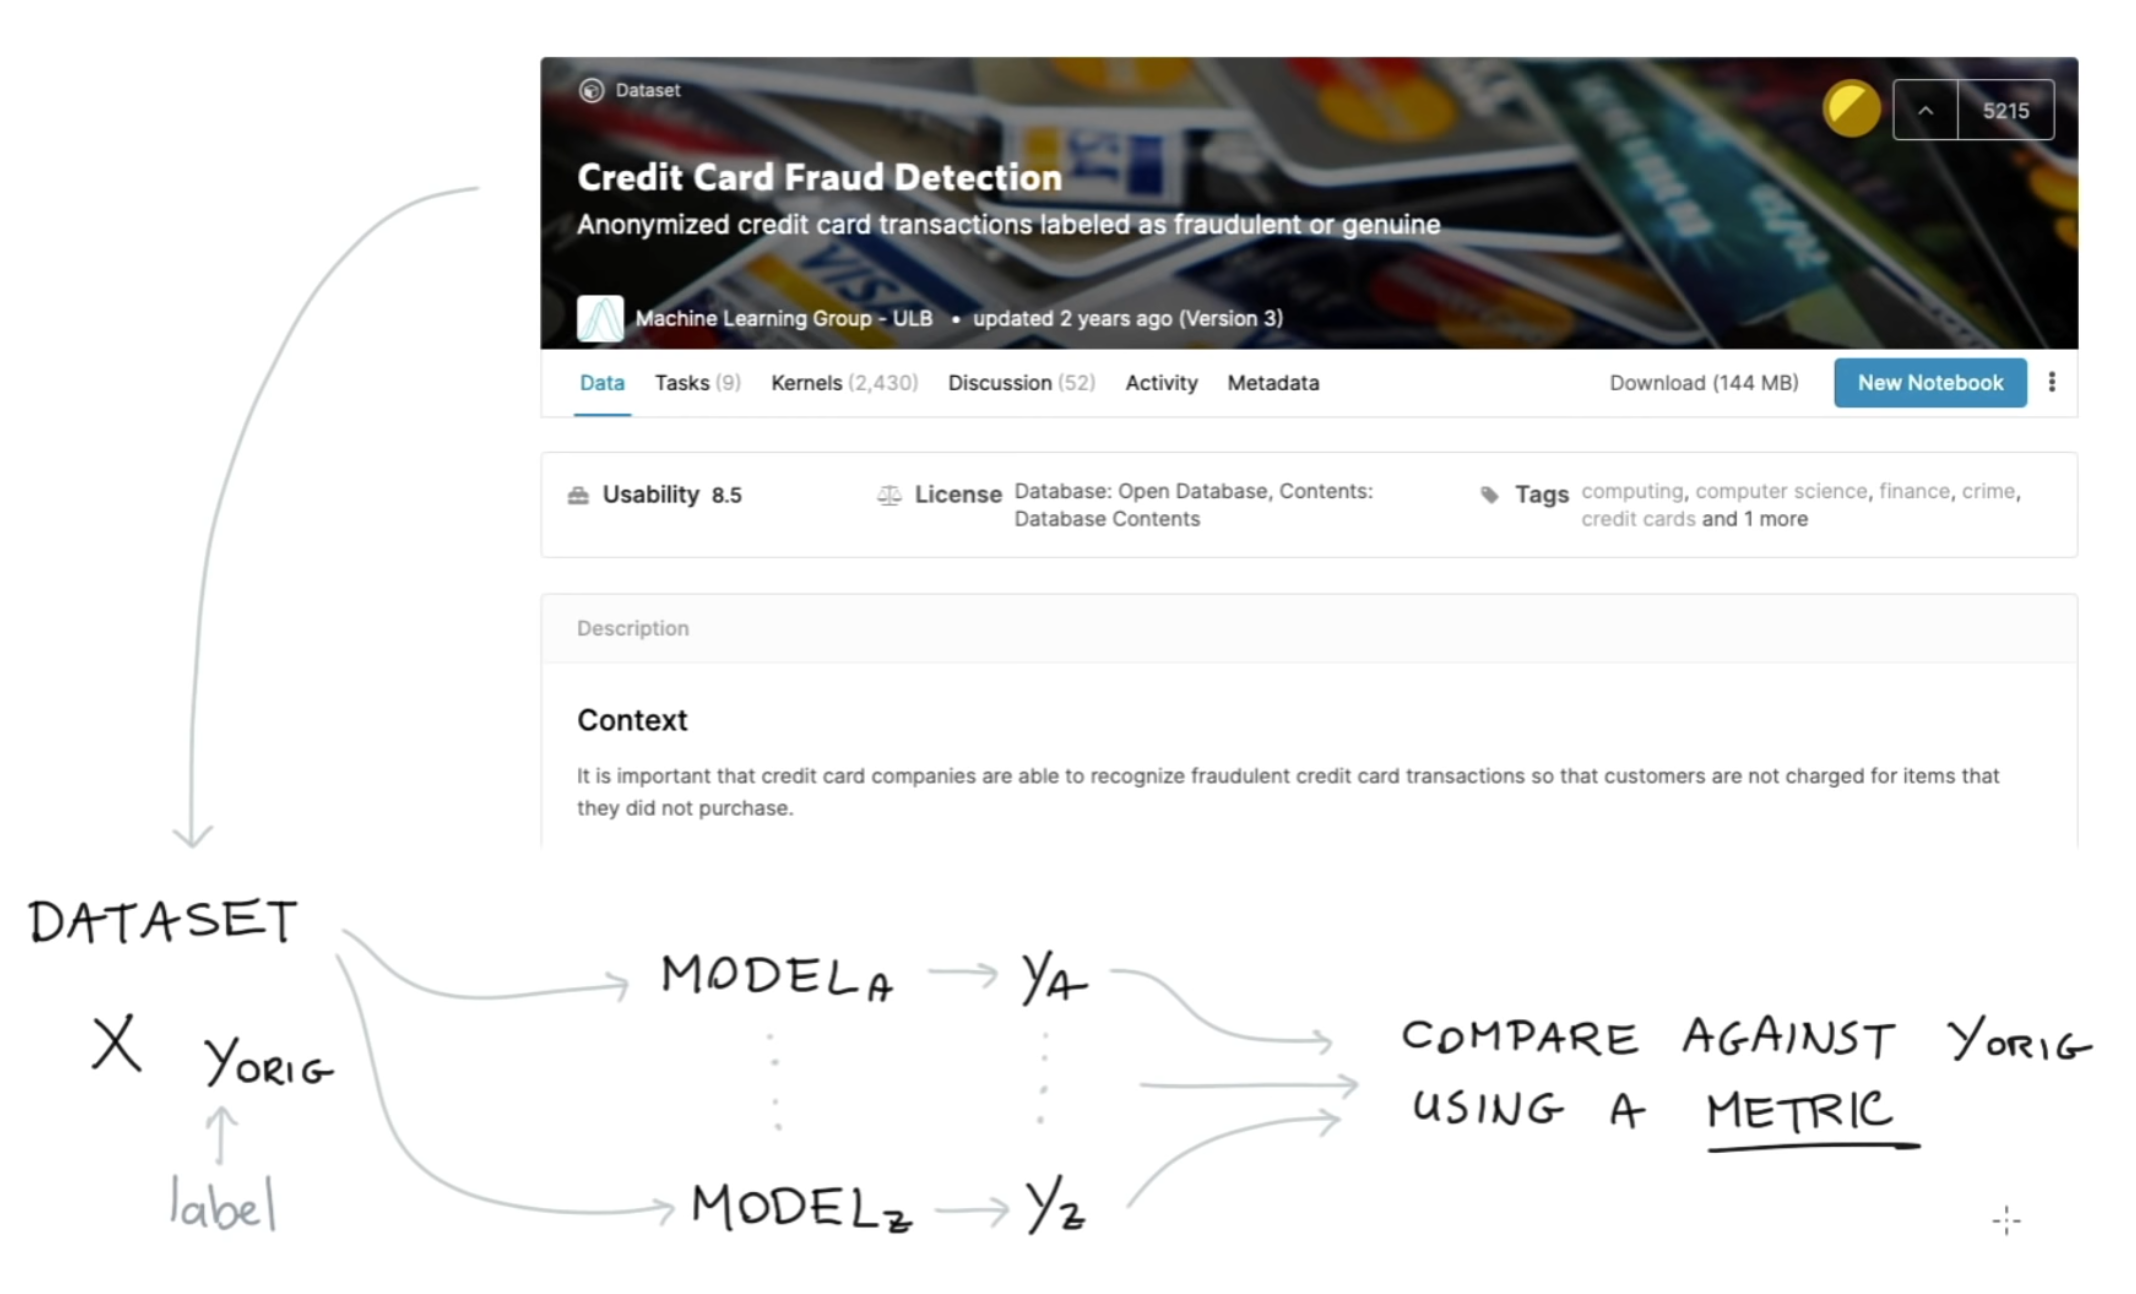
</div>

In [145]:
df = pd.read_csv('../datasets/kaggle_creditcard.csv')

In [204]:
df_cc = df[:80000]
subset_cols = ['Time','V1','V2','Amount','Class']

print(f"Num rows: {pd_get_rowcount(df_cc,as_str=True)}")
display(df_cc[subset_cols].head())
print(f"Full list of cols: {df_cc.dtypes.to_dict()}")

Num rows: 80,000

Time        V1        V2  Amount  Class
0   0.0 -1.359807 -0.072781  149.62      0
1   0.0  1.191857  0.266151    2.69      0
2   1.0 -1.358354 -1.340163  378.66      0
3   1.0 -0.966272 -0.185226  123.50      0
4   2.0 -1.158233  0.877737   69.99      0

Full list of cols: {'Time': dtype('float64'), 'V1': dtype('float64'), 'V2': dtype('float64'), 'V3': 
dtype('float64'), 'V4': dtype('float64'), 'V5': dtype('float64'), 'V6': dtype('float64'), 'V7': dtype('float64'), 
'V8': dtype('float64'), 'V9': dtype('float64'), 'V10': dtype('float64'), 'V11': dtype('float64'), 'V12': 
dtype('float64'), 'V13': dtype('float64'), 'V14': dtype('float64'), 'V15': dtype('float64'), 'V16': 
dtype('float64'), 'V17': dtype('float64'), 'V18': dtype('float64'), 'V19': dtype('float64'), 'V20': 
dtype('float64'), 'V21': dtype('float64'), 'V22': dtype('float64'), 'V23': dtype('float64'), 'V24': 
dtype('float64'), 'V25': dtype('float64'), 'V26': dtype('float64'), 'V27': dtype('float64'), 'V28': 
dtype('float64'), 'Amount': dtype('float64'), 'Class': dtype('int64')}

As can be seen there are quite anonymised columns. Now let's get the X and Y values

In [147]:
df_cc[subset_cols].describe()

Time            V1            V2        Amount         Class
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000
mean   37332.183588     -0.258086     -0.036364     97.775498      0.002450
std    15209.718131      1.888947      1.679465    269.180362      0.049437
min        0.000000    -56.407510    -72.715728      0.000000      0.000000
25%    30718.500000     -1.019388     -0.599350      7.680000      0.000000
50%    40052.000000     -0.250144      0.069013     26.955000      0.000000
75%    49105.000000      1.153620      0.721751     89.205000      0.000000
max    58287.000000      1.960497     18.902453  19656.530000      1.000000

In [148]:
X = df_cc.drop(columns=['Time', 'Amount', 'Class']).values
y = df_cc['Class'].values

print(f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}")
print(f"Unique values from y = {np.unique(y)}")

Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196

Unique values from y = [0 1]

Notice the imbalance in the dataset here, i.e. that there is an abundance of `0` classes over `1` classes for the `y` (Fraud cases) value!

As is evident in the example below, we can see a poor performance with a quick evaluation of the total positive detections in the prediction. We can see that it's biased towards the negative samples, when overfitted on train set...

In [149]:
# Max_iter is set higher here to allow it to converge within num iterations given
# due to the imbalanced dataset, warning results otherwise

model = LogisticRegression(max_iter=1000)
model.fit(X,y).predict(X).sum()

151

Let's specify the class weights in LR -> i.e. allows us to assign how much weight to assign for each class, i.e. ratio of number of samples to take for training per class. This will fix the imbalance!

In [151]:
model = LogisticRegression(class_weight={0:1,1:2},max_iter=1000)
model.fit(X,y).predict(X).sum()

171

Notice now that there is a metric that I'd like to optimise for, i.e. with the `class_weight` param. We can use `GridSearchCV` for this! The following params will be used for gscv:
- n_jobs (number of cores): `-1` to use all cores, default `None`

In [156]:
gscv = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:v} for v in range(1,4)]},
    cv=4,
    n_jobs=-1
)

gscv.fit(X,y).predict(X).sum()

151

Notice now - how when predicting it selects the best one. However the best one here is the worst performing one. This is because it uses its own scoring table for model selection - let's take a look at the scoring it uses, i.e. in this case from `LogisticRegression`.

In [201]:
cv_results = gscv_summarize(gscv,short=True)
print(f"Score of selected model to original labels: {gscv.score(X,y)*100:.2f}%")
display(cv_results)
??LogisticRegression.score

Score of selected model to original labels: 99.86%

params  mean_test_score  std_test_score  \
0  {'class_weight': {0: 1, 1: 1}}         0.997413        0.002030   
1  {'class_weight': {0: 1, 1: 2}}         0.996575        0.003697   
2  {'class_weight': {0: 1, 1: 3}}         0.995875        0.004980   

   rank_test_score  
0                1  
1                2  
2                3

Signature: LogisticRegression.score(self, X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
        """
        from .metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      ~/venv/dev/lib/pyth

As we can see, it bases its scoring according to `accuracy`, e.g. no fraud most of the time. Since the results are largely false, the final model does have a high accuracy when predicting more false than true. Although this is not the metric we exactly want. An alternative scoring metric can be the:

- `precision_score`: given that I predict fraud, how accurate am I?
- `recall_score`: did I get all the fraud cases?

In [206]:
from sklearn.metrics import precision_score, recall_score, make_scorer

print(f"Recall_score of grid search: {recall_score(y,gscv.predict(X))*100:.2f}%")

Recall_score of grid search: 59.18%

Let's now incorporate the more useful metrics into our gscv. Notice the following changes:
- how we use the `make_scorer` function here, which is smt needed if we want to pass it for use into gscv.
- `scoring`: Custom defined scorer to also factor in the `cv_results_` evaluation
- `refit`: Which scorer should the grid search CV use in its selection for best model, i.e. which scorer to follow when ranking best models
- `return_train_score`: See the train scores as well in CV results, just for complete viewing!

In [269]:
gscv_metrics = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:v} for v in np.linspace(1,20,30)]}, # Using np.linspace > range() for higher reso. 1-20, with 30 intervals inbetween
    scoring={'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='precision_score',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
gscv_metrics.fit(X,y)

/Users/iliono/venv/dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision_score', return_train_score=True,
             scoring={'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [284]:
gscv_results = gscv_summarize(gscv_metrics,short=True)
cols_subset = [
    'params',
    'mean_test_precision_score',
    'mean_test_recall_score',
    'std_test_precision_score',
    'std_test_recall_score',
    'rank_test_precision_score',
]

print(gscv_results.dtypes)
print("\n\nSorted by mean_test_precision_score\n\n")
display(
    gscv_results
    [cols_subset]
    .sort_values(by='mean_test_precision_score',ascending=False)
    .head()
)

print("\n\nSorted by mean_test_recall_score\n\n")
display(
    gscv_results
    [cols_subset]
    .sort_values(by='mean_test_recall_score',ascending=False)
    .head()
)

params                         object
mean_test_precision_score     float64
mean_train_precision_score    float64
mean_test_recall_score        float64
mean_train_recall_score       float64
std_test_precision_score      float64
std_train_precision_score     float64
std_test_recall_score         float64
std_train_recall_score        float64
rank_test_precision_score       int32
rank_test_recall_score          int32
dtype: object

Sorted by mean_test_precision_score

params  mean_test_precision_score  \
2   {'class_weight': {0: 1, 1: 2.310344827586207}}                   0.882453   
1  {'class_weight': {0: 1, 1: 1.6551724137931034}}                   0.882453   
3  {'class_weight': {0: 1, 1: 2.9655172413793105}}                   0.881349   
6   {'class_weight': {0: 1, 1: 4.931034482758621}}                   0.876749   
5   {'class_weight': {0: 1, 1: 4.275862068965517}}                   0.874683   

   mean_test_recall_score  std_test_precision_score  std_test_recall_score  \
2                0.650000                  0.188209               0.245838   
1                0.634737                  0.188209               0.249916   
3                0.681053                  0.190678               0.230791   
6                0.747632                  0.187565               0.211427   
5                0.732632                  0.187553               0.215999   

   rank_test_precision_score  
2                          1  
1                          1  
3                          3  
6                          4  
5                          5

Sorted by mean_test_recall_score

params  \
29                {'class_weight': {0: 1, 1: 20.0}}   
28  {'class_weight': {0: 1, 1: 19.344827586206897}}   
27  {'class_weight': {0: 1, 1: 18.689655172413794}}   
26   {'class_weight': {0: 1, 1: 18.03448275862069}}   
25  {'class_weight': {0: 1, 1: 17.379310344827587}}   

    mean_test_precision_score  mean_test_recall_score  \
29                   0.780411                0.843421   
28                   0.784599                0.843421   
27                   0.788547                0.843421   
26                   0.796181                0.838421   
25                   0.799627                0.838421   

    std_test_precision_score  std_test_recall_score  rank_test_precision_score  
29                  0.198093               0.127355                         30  
28                  0.195801               0.127355                         28  
27                  0.195462               0.127355                         27  
26                  0.193959               0.135567                         26  
25                  0.188085               0.135567                         25

Let's now plot the results when cross validating between **precision** and **recall**

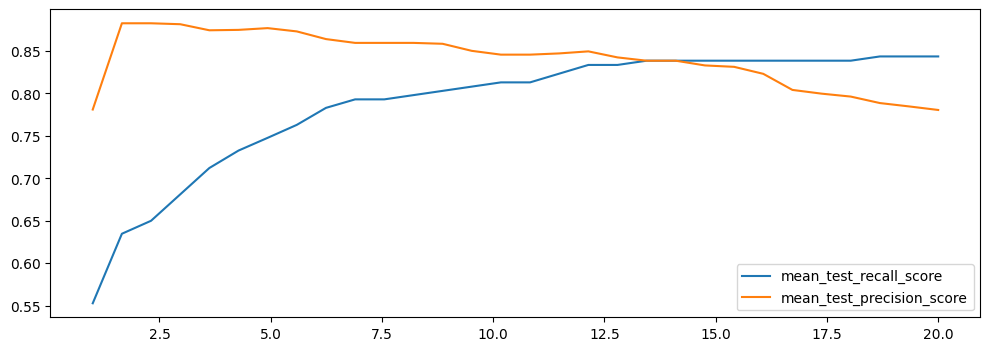

In [293]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,4))
df = gscv_summarize(gscv_metrics)
for score in ['mean_test_recall_score','mean_test_precision_score']:
    plt.plot(
        [_[1] for _ in df['params'].map(lambda row: row["class_weight"])],
        df[score],
        label=score
    )
plt.legend();

Notice here

<div>
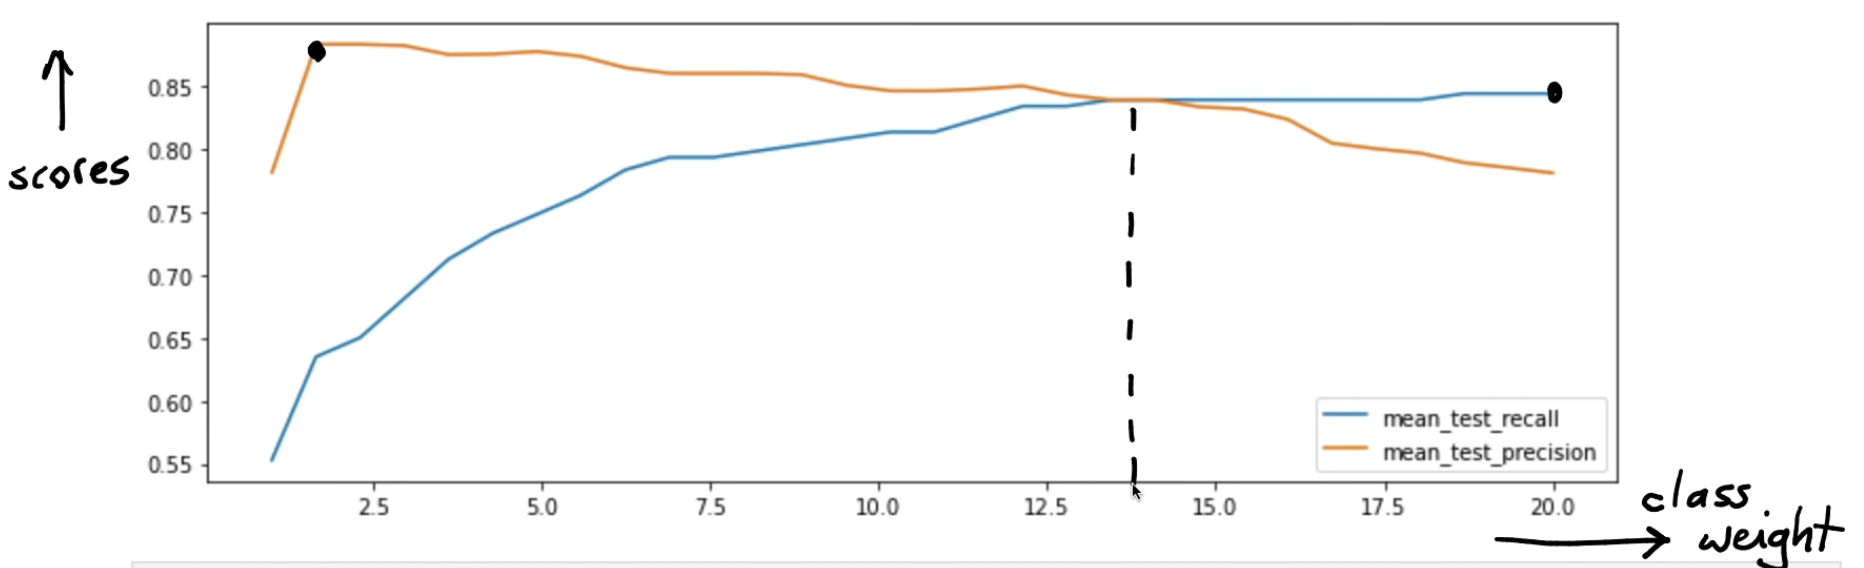
</div>

<div>
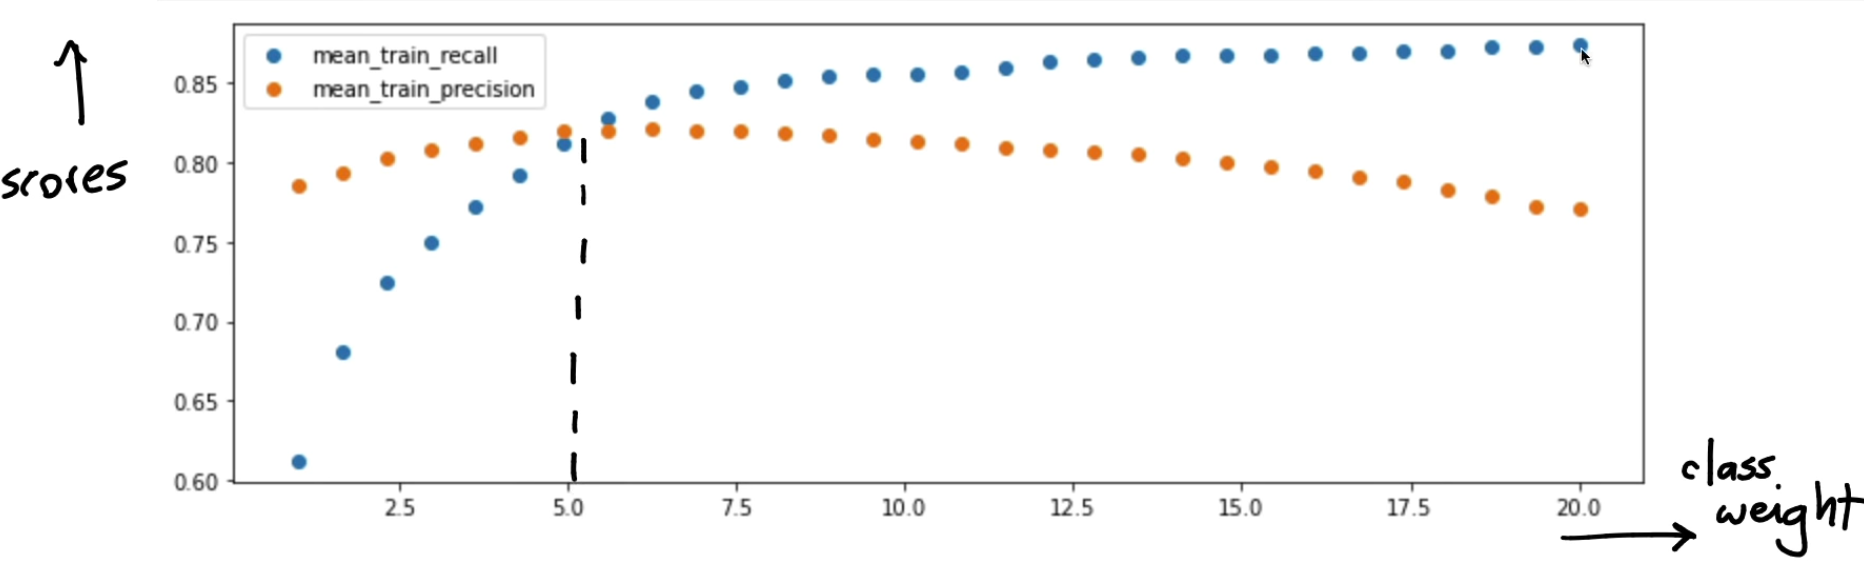
</div>

In [404]:
def min_recall_precision(y_true,y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

gscv_metrics_cust = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:v} for v in np.linspace(1,20,30)]}, # Using np.linspace > range() for higher reso. 1-20, with 30 intervals inbetween
    scoring={
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'min_recall_precision': make_scorer(min_recall_precision,greater_is_better=True),
    },
    refit='min_recall_precision',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
gscv_metrics_cust.fit(X,y)

/Users/iliono/venv/dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/iliono/venv/dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/iliono/venv/dev/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_recall_precision', return_train_score=True,
             scoring={'min_recall_precision': make_scorer(min_recall_precision),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

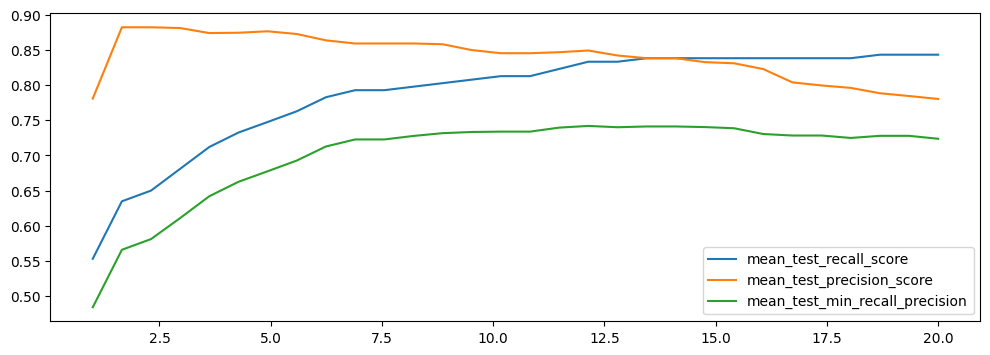

In [405]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,4))
df = gscv_summarize(gscv_metrics_cust)
for score in ['mean_test_recall_score','mean_test_precision_score','mean_test_min_recall_precision']:
    plt.plot(
        [_[1] for _ in df['params'].map(lambda row: row["class_weight"])],
        df[score],
        label=score
    )
plt.legend();

Notice below how the value

In [440]:
val = []
for col in ['test_precision_score_splits','test_recall_score_splits','test_min_recall_precision_splits']:
    val += skl_gscv_summarize(gscv_metrics_cust,short=False)[[col]].iloc[0].tolist()
df = DataFrame(val).rename(index={0:'test_precision_score_splits_1',1:'test_recall_score_splits_1',2:'test_min_recall_precision_splits_1'})

display(df)
display(df.apply(pd.DataFrame.describe,axis=1)[['mean','std','min','max']])

0       1       2       3     4  \
test_precision_score_splits_1       1.0000  0.4634  0.5833  1.0000  1.00   
test_recall_score_splits_1          0.3684  1.0000  0.7368  0.4737  0.35   
test_min_recall_precision_splits_1  0.3684  0.4634  0.5833  0.4737  0.35   

                                         5    6       7    8    9  
test_precision_score_splits_1       0.9444  1.0  0.8182  0.0  1.0  
test_recall_score_splits_1          0.8500  0.9  0.4500  0.0  0.4  
test_min_recall_precision_splits_1  0.8500  0.9  0.4500  0.0  0.4

mean       std  min  max
test_precision_score_splits_1       0.78093  0.336288  0.0  1.0
test_recall_score_splits_1          0.55289  0.309769  0.0  1.0
test_min_recall_precision_splits_1  0.48388  0.256296  0.0  0.9

In [441]:
skl_gscv_summarize(gscv_metrics_cust,short=False)[['params','mean_test_precision_score','mean_test_recall_score','mean_test_min_recall_precision']].head()

params  mean_test_precision_score  \
0                 {'class_weight': {0: 1, 1: 1.0}}                   0.780937   
1  {'class_weight': {0: 1, 1: 1.6551724137931034}}                   0.882453   
2   {'class_weight': {0: 1, 1: 2.310344827586207}}                   0.882453   
3  {'class_weight': {0: 1, 1: 2.9655172413793105}}                   0.881349   
4  {'class_weight': {0: 1, 1: 3.6206896551724137}}                   0.874206   

   mean_test_recall_score  mean_test_min_recall_precision  
0                0.552895                        0.483885  
1                0.634737                        0.565727  
2                0.650000                        0.580991  
3                0.681053                        0.610940  
4                0.712105                        0.641992

# Last stopped: 01:10:00